In [1]:
import numpy as np
import numpy.random as rd
import pandas as pd

import seaborn as sns
import math
import sklearn

import pystan
from pystan import StanModel

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_T = pd.read_csv('Campylobacter_Competitiondata_Trans.csv')
print(df_T)

    Time      CO94      CO92      CO91      CO44      CO42      CO41  \
0      0  3.662758  2.176091  0.221849  3.623249  2.243038  1.124939   
1      0  4.079181  2.477121  1.522879  3.707570  2.414973  1.066947   
2      0  3.851258  2.146128  1.452298  4.051153  2.255273  1.500602   
3      6  3.423246  1.698970  0.698970  4.110590  2.829304  1.845098   
4      6  3.676694  1.176091  1.602060  4.204120  3.174641  2.113943   
5      6  3.498311  1.698970  0.698970  4.193125  2.949390  1.977724   
6     12  4.236789  1.977724  1.176091  5.322219  3.230449  3.454845   
7     12  2.977724  1.653213  1.176091  5.816241  3.096910  2.778151   
8     12  3.838849  3.190332  0.698970  5.518514  2.845098  2.544068   
9     24  4.217484  2.698970  0.000000  6.113943  4.397940  2.544068   
10    24  5.480725  4.913814  2.255273  7.489255  5.561101  5.053078   
11    24  5.397071  4.648360  2.301030  7.562293  5.725912  4.997823   
12    36  3.462398  1.875061  0.000000  4.975432  3.176091  2.47

In [3]:
C94 = df_T.iloc[0:24 , 1]
C92 = df_T.iloc[0:24 , 2]
C91 = df_T.iloc[0:24 , 3]
C44 = df_T.iloc[0:24 , 4]
C42 = df_T.iloc[0:24 , 5]
C41 = df_T.iloc[0:24 , 6]

E94 = df_T.iloc[0:24 , 7]
E92 = df_T.iloc[0:24 , 8]
E91 = df_T.iloc[0:24 , 9]
E44 = df_T.iloc[0:24 , 10]
E42 = df_T.iloc[0:24 , 11]
E41 = df_T.iloc[0:24 , 12]

C04 = df_T.iloc[0:24 , 13]
C02 = df_T.iloc[0:24 , 14]
C01 = df_T.iloc[0:24 , 15]

#Time
ts = df_T.iloc[0:24, 0].values

#個数N
N = len(df_T) 

In [4]:
ts_add = np.arange(0, 72.1, 20/100, dtype="float")

In [5]:
ts_add

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2,
       26.4, 26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4,
       28.6, 28.8, 29. , 29.2, 29.4, 29.6, 29.8, 30

In [6]:
N_add = len(ts_add)

In [7]:
dat_C94 = {'N' : N, 'ts' : ts, 'y' : C94, 'N_add' : N_add, 'ts_add': ts_add}
dat_C92 = {'N' : N, 'ts' : ts, 'y' : C92, 'N_add' : N_add, 'ts_add': ts_add}
dat_C91 = {'N' : N, 'ts' : ts, 'y' : C91, 'N_add' : N_add, 'ts_add': ts_add}
dat_C44 = {'N' : N, 'ts' : ts, 'y' : C44, 'N_add' : N_add, 'ts_add': ts_add}
dat_C42 = {'N' : N, 'ts' : ts, 'y' : C42, 'N_add' : N_add, 'ts_add': ts_add}
dat_C41 = {'N' : N, 'ts' : ts, 'y' : C41, 'N_add' : N_add, 'ts_add': ts_add}

dat_E94 = {'N' : N, 'ts' : ts, 'y' : E94, 'N_add' : N_add, 'ts_add': ts_add}
dat_E92 = {'N' : N, 'ts' : ts, 'y' : E92, 'N_add' : N_add, 'ts_add': ts_add}
dat_E91 = {'N' : N, 'ts' : ts, 'y' : E91, 'N_add' : N_add, 'ts_add': ts_add}
dat_E44 = {'N' : N, 'ts' : ts, 'y' : E44, 'N_add' : N_add, 'ts_add': ts_add}
dat_E42 = {'N' : N, 'ts' : ts, 'y' : E42, 'N_add' : N_add, 'ts_add': ts_add}
dat_E41 = {'N' : N, 'ts' : ts, 'y' : E41, 'N_add' : N_add, 'ts_add': ts_add}

dat_C04 = {'N' : N, 'ts' : ts, 'y' : C04, 'N_add' : N_add, 'ts_add': ts_add}
dat_C02 = {'N' : N, 'ts' : ts, 'y' : C02, 'N_add' : N_add, 'ts_add': ts_add}
dat_C01 = {'N' : N, 'ts' : ts, 'y' : C01, 'N_add' : N_add, 'ts_add': ts_add}

In [8]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(4, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0cf23703a89b649130eb93cc8d229425 NOW.


CPU times: user 1.46 s, sys: 149 ms, total: 1.61 s
Wall time: 1min 7s


In [9]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C94 = stm.sampling(data=dat_C94, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.52 s, sys: 229 ms, total: 3.75 s
Wall time: 11.1 s


In [10]:
print(fit_C94)

Inference for Stan model: anon_model_0cf23703a89b649130eb93cc8d229425.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         4.32    0.02   0.62   3.36    4.0   4.28   4.55    5.4   1136    1.0
N0           3.96  7.8e-3   0.45   2.99    3.7   3.99   4.25   4.77   3315    1.0
mumax        1.47    0.01   1.05   0.08   0.71   1.24   1.99   4.23   4904    1.0
lag         32.77    0.37  21.77   1.69  13.68  28.43  52.53  70.51   3374    1.0
sigma        1.35  3.1e-3   0.21   1.02   1.21   1.33   1.48   1.83   4546    1.0
y_add[1]     3.96  7.8e-3   0.45   2.99    3.7   3.99   4.25   4.77   3315    1.0
y_add[2]     3.96  7.7e-3   0.44   2.99    3.7   3.99   4.24   4.76   3342    1.0
y_add[3]     3.96  7.6e-3   0.44   2.99    3.7   3.99   4.24   4.76   3358    1.0
y_add[4]     3.96  7.6e-3   0.44   2.99    3.7   3.99   4.24   4.75   33

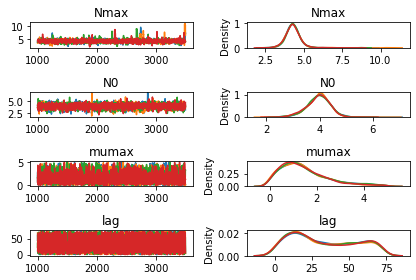

In [11]:
samples =   fit_C94.extract(permuted=False, inc_warmup=True)
paraname =  fit_C94.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C94.extract(permuted=False, inc_warmup=True)
iter_from = fit_C94.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        
    plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/koenyoslide_Camp_94_param.pdf",transparent=True,bbox_inches='tight')
    plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/koenyoslide_Camp_94_param.png",transparent=True,bbox_inches='tight')

    plt.show()

In [10]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(4, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a6c966d02eafc0453b2144654a3f7663 NOW.


CPU times: user 1.32 s, sys: 82.7 ms, total: 1.4 s
Wall time: 1min 3s


In [11]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C92 = stm.sampling(data=dat_C92, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.48 s, sys: 220 ms, total: 3.7 s
Wall time: 12.1 s


In [14]:
print(fit_C92)

Inference for Stan model: anon_model_a6c966d02eafc0453b2144654a3f7663.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax          3.6    0.01    0.7    2.6   3.21   3.52   3.87   5.15   2183    1.0
N0           2.22    0.01    0.5    1.2    1.9   2.24   2.57   3.18   2375    1.0
mumax        1.48    0.02   1.07   0.08   0.68   1.25   2.01   4.24   4232    1.0
lag          29.4    0.52  19.95   3.55  13.18  20.86  48.44  68.91   1492    1.0
sigma        1.57  4.3e-3   0.25   1.17   1.39   1.54   1.71   2.14   3311    1.0
y_add[1]     2.22    0.01    0.5    1.2    1.9   2.24   2.57   3.18   2375    1.0
y_add[2]     2.23    0.01    0.5    1.2    1.9   2.24   2.57   3.18   2369    1.0
y_add[3]     2.23    0.01    0.5    1.2    1.9   2.24   2.57   3.18   2365    1.0
y_add[4]     2.23    0.01    0.5    1.2    1.9   2.25   2.57   3.18   23

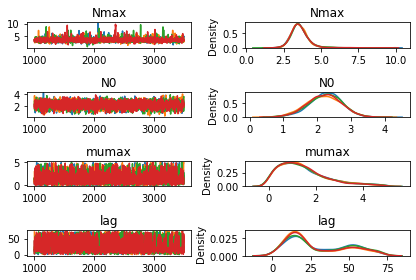

In [15]:
samples = fit_C92.extract(permuted=False, inc_warmup=True)
paraname = fit_C92.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C92.extract(permuted=False, inc_warmup=True)
iter_from = fit_C92.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C92.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [12]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(2, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8fbf670bc33bb181d9c699188badf283 NOW.


CPU times: user 1.46 s, sys: 76.2 ms, total: 1.54 s
Wall time: 1min 3s


In [13]:
n_itr = 3500
n_warmup = 1000
chains = 4
0
# サンプリングの実行
%time fit_C91 = stm.sampling(data=dat_C91, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.48 s, sys: 232 ms, total: 3.72 s
Wall time: 13.5 s


In [18]:
print(fit_C91)

Inference for Stan model: anon_model_8fbf670bc33bb181d9c699188badf283.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         1.72    0.03   1.16   0.49   1.09   1.46   2.03   4.84   1169    1.0
N0           1.11  7.9e-3   0.34   0.49   0.91   1.09   1.29   1.85   1817    1.0
mumax        1.43    0.02   1.06   0.05   0.66   1.21   1.92   4.27   3035    1.0
lag         47.62    0.58  22.27   2.07   30.8  57.53   66.3  71.43   1461    1.0
sigma        1.03  2.7e-3   0.16   0.77   0.91    1.0   1.12    1.4   3640    1.0
y_add[1]     1.11  7.9e-3   0.34   0.49   0.91   1.09   1.29   1.85   1817    1.0
y_add[2]     1.11  7.7e-3   0.33   0.49   0.91   1.09   1.29   1.84   1834    1.0
y_add[3]     1.11  7.6e-3   0.33   0.49   0.91   1.09   1.29   1.83   1866    1.0
y_add[4]     1.11  7.4e-3   0.32   0.49   0.91   1.09   1.29    1.8   19

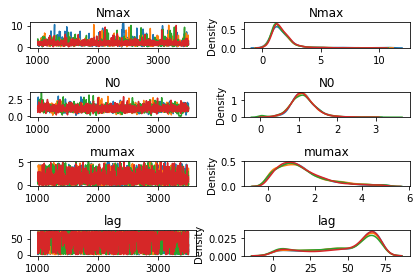

In [19]:
samples = fit_C91.extract(permuted=False, inc_warmup=True)
paraname = fit_C91.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_C91.extract(permuted=False, inc_warmup=True)
iter_from = fit_C91.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_C91.sim['fnames_oi']
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [14]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(6, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_25d7cdf817aee569587fb7258902be78 NOW.


CPU times: user 1.62 s, sys: 87.8 ms, total: 1.71 s
Wall time: 1min 4s


In [15]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C44 = stm.sampling(data=dat_C44, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.6 s, sys: 229 ms, total: 3.83 s
Wall time: 8.95 s


In [22]:
print(fit_C44)

Inference for Stan model: anon_model_25d7cdf817aee569587fb7258902be78.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax          5.6    0.02    0.4   4.98    5.4   5.59   5.77   6.15    673    1.0
N0           4.04    0.01   0.54   2.98    3.7   4.02   4.38   5.16   2102    1.0
mumax        1.57    0.02    1.0   0.32   0.84   1.33   2.02   4.29   2859    1.0
lag         10.17    0.43   11.4    0.9   5.14   7.51  10.22  55.17    711    1.0
sigma        1.12  3.4e-3   0.18   0.83   0.99    1.1   1.23   1.55   2936    1.0
y_add[1]     4.04    0.01   0.54   2.98    3.7   4.02   4.38   5.16   2102    1.0
y_add[2]     4.04    0.01   0.54    3.0    3.7   4.02   4.38   5.16   2106    1.0
y_add[3]     4.05    0.01   0.54    3.0   3.71   4.03   4.38   5.16   2109    1.0
y_add[4]     4.05    0.01   0.54   3.01   3.71   4.03   4.38   5.16   21

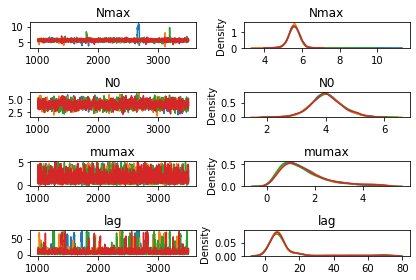

In [23]:
samples =   fit_C44.extract(permuted=False, inc_warmup=True)
paraname =  fit_C44.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C44.extract(permuted=False, inc_warmup=True)
iter_from = fit_C44.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [16]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(5, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0bbbf5dfabc7908e03592ea334f57e7d NOW.


CPU times: user 1.63 s, sys: 107 ms, total: 1.74 s
Wall time: 1min 4s


In [17]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C42 = stm.sampling(data=dat_C42, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.6 s, sys: 231 ms, total: 3.83 s
Wall time: 12 s


In [26]:
print(fit_C42)

Inference for Stan model: anon_model_0bbbf5dfabc7908e03592ea334f57e7d.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         4.33  4.4e-3   0.33   3.68   4.12   4.33   4.55   4.98   5611    1.0
N0           2.57  7.9e-3   0.49   1.61   2.25   2.56   2.87   3.56   3863    1.0
mumax        1.54    0.02   1.01   0.25   0.79   1.31   2.04   4.21   4205    1.0
lag         13.69    0.21   8.85   1.46   8.85  12.95  17.37  33.88   1858    1.0
sigma        1.23  2.8e-3   0.19   0.91   1.09    1.2   1.34   1.67   4676    1.0
y_add[1]     2.57  7.9e-3   0.49   1.61   2.25   2.56   2.87   3.56   3863    1.0
y_add[2]     2.57  7.8e-3   0.49   1.62   2.26   2.57   2.87   3.56   3885    1.0
y_add[3]     2.57  7.8e-3   0.49   1.62   2.26   2.57   2.87   3.56   3909    1.0
y_add[4]     2.57  7.7e-3   0.48   1.62   2.26   2.57   2.87   3.56   39

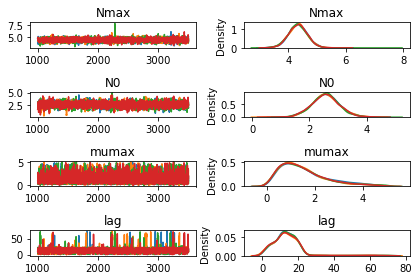

In [27]:
samples =   fit_C42.extract(permuted=False, inc_warmup=True)
paraname =  fit_C42.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C42.extract(permuted=False, inc_warmup=True)
iter_from = fit_C42.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [18]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(3, 1);
 N0 ~ cauchy(1, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d27a60a68a366b9d3248913c94a3dcb4 NOW.


CPU times: user 1.68 s, sys: 95.9 ms, total: 1.77 s
Wall time: 1min 3s


In [19]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C41 = stm.sampling(data=dat_C41, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.56 s, sys: 231 ms, total: 3.79 s
Wall time: 10.5 s


In [30]:
print(fit_C41)

Inference for Stan model: anon_model_d27a60a68a366b9d3248913c94a3dcb4.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax          3.1  5.7e-3   0.38   2.36   2.87   3.11   3.33   3.81   4354    1.0
N0           1.55    0.01   0.67   0.31   1.07   1.49    2.0   2.93   2903    1.0
mumax        1.55    0.02   1.01   0.23   0.82   1.33   2.04   4.22   3774    1.0
lag         12.13    0.31  14.07   0.48   4.09   7.66   13.7   60.6   2054    1.0
sigma        1.48  4.0e-3   0.24    1.1   1.32   1.45   1.61   2.04   3677    1.0
y_add[1]     1.55    0.01   0.67   0.31   1.07   1.49    2.0   2.93   2903    1.0
y_add[2]     1.55    0.01   0.67   0.32   1.08    1.5    2.0   2.93   2919    1.0
y_add[3]     1.55    0.01   0.67   0.33   1.08    1.5    2.0   2.93   2938    1.0
y_add[4]     1.56    0.01   0.66   0.35   1.09   1.51   2.01   2.93   29

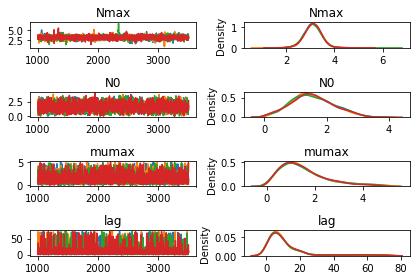

In [31]:
samples =   fit_C41.extract(permuted=False, inc_warmup=True)
paraname =  fit_C41.sim["fnames_oi"]
palette =   sns.color_palette()
ms =        fit_C41.extract(permuted=False, inc_warmup=True)
iter_from = fit_C41.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
num_pages = 1

for pg in range(num_pages):
    plt.figure()
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    plt.show()

In [20]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(9, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_13b08c1bd6f3cb9ad95355f612e6b1ef NOW.


CPU times: user 1.64 s, sys: 102 ms, total: 1.74 s
Wall time: 1min 3s


In [21]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E94 = stm.sampling(data=dat_E94, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.56 s, sys: 228 ms, total: 3.79 s
Wall time: 9.94 s


In [22]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E92 = stm.sampling(data=dat_E92, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.45 s, sys: 229 ms, total: 3.68 s
Wall time: 7.95 s


In [23]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E91 = stm.sampling(data=dat_E91, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.66 s, sys: 224 ms, total: 3.89 s
Wall time: 10.9 s


In [24]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dbd4405be28c95e89c84d188c49fd742 NOW.


CPU times: user 1.59 s, sys: 114 ms, total: 1.71 s
Wall time: 1min 6s


In [25]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E44 = stm.sampling(data=dat_E44, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.94 s, sys: 324 ms, total: 4.26 s
Wall time: 37.1 s


In [26]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(9, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(2, 1);
 sigma ~ cauchy(0, 0.5);
 lag ~ cauchy(1, 1);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c21cf51738e66feb0c53d6354834a46b NOW.


CPU times: user 1.38 s, sys: 104 ms, total: 1.49 s
Wall time: 1min 5s


In [27]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E42 = stm.sampling(data=dat_E42, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.59 s, sys: 238 ms, total: 3.83 s
Wall time: 17.7 s


In [28]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_E41 = stm.sampling(data=dat_E41, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.5 s, sys: 224 ms, total: 3.73 s
Wall time: 18.2 s


In [98]:
print(fit_E94)

Inference for Stan model: anon_model_13b08c1bd6f3cb9ad95355f612e6b1ef.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.04  3.4e-4   0.03   8.99   9.03   9.04   9.06   9.09   5824    1.0
N0           8.53  8.4e-4   0.07    8.4   8.49   8.53   8.57   8.66   6178    1.0
mumax        2.04    0.02    1.0   0.68   1.27    1.8   2.61   4.47   3321    1.0
lag          2.09    0.02   1.31   0.09   0.97   1.98   3.09   4.69   3510    1.0
sigma        0.12  2.5e-4   0.02   0.09    0.1   0.11   0.13   0.16   5674    1.0
y_add[1]     8.55  9.9e-4   0.07   8.41    8.5   8.54   8.59   8.69   4920    1.0
y_add[2]     8.56  1.3e-3   0.08   8.42   8.51   8.56   8.61   8.74   3803    1.0
y_add[3]     8.58  1.6e-3    0.1   8.42   8.52   8.57   8.63   8.81   3329    1.0
y_add[4]      8.6  2.0e-3   0.11   8.43   8.52   8.58   8.66   8.87   31

In [99]:
print(fit_E92)

Inference for Stan model: anon_model_13b08c1bd6f3cb9ad95355f612e6b1ef.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.02  3.6e-4   0.03   8.97    9.0   9.02   9.04   9.07   5055    1.0
N0            8.6  9.0e-4   0.07   8.46   8.55    8.6   8.64   8.73   5584    1.0
mumax        2.06    0.02   1.02   0.69   1.28   1.82   2.66   4.52   3867    1.0
lag          2.01    0.02    1.3    0.1    0.9   1.88   2.97   4.66   3589    1.0
sigma        0.11  2.8e-4   0.02   0.08    0.1   0.11   0.12   0.16   4499    1.0
y_add[1]     8.61  9.7e-4   0.07   8.48   8.56   8.61   8.65   8.75   5068    1.0
y_add[2]     8.63  1.2e-3   0.08   8.48   8.58   8.62   8.67   8.79   4255    1.0
y_add[3]     8.64  1.5e-3   0.09   8.49   8.58   8.64   8.69   8.84   3706    1.0
y_add[4]     8.66  1.7e-3    0.1   8.49   8.59   8.65   8.72    8.9   34

In [100]:
print(fit_E91)

Inference for Stan model: anon_model_13b08c1bd6f3cb9ad95355f612e6b1ef.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.05  3.8e-4   0.03    9.0   9.03   9.05   9.07   9.11   5923    1.0
N0           8.57  1.1e-3   0.08   8.42   8.52   8.57   8.62   8.72   5229    1.0
mumax        1.99    0.02   0.98   0.66   1.24   1.76   2.54   4.38   4221    1.0
lag          2.07    0.03   1.81    0.1   0.91   1.91   3.05    4.7   2875    1.0
sigma        0.13  3.1e-4   0.02    0.1   0.12   0.13   0.14   0.18   4708    1.0
y_add[1]     8.58  1.1e-3   0.08   8.43   8.53   8.58   8.64   8.74   5026    1.0
y_add[2]      8.6  1.3e-3   0.09   8.43   8.54    8.6   8.66   8.79   4348    1.0
y_add[3]     8.62  1.6e-3    0.1   8.44   8.55   8.61   8.68   8.84   3837    1.0
y_add[4]     8.64  1.9e-3   0.11   8.44   8.56   8.63   8.71    8.9   35

In [101]:
print(fit_E44)

Inference for Stan model: anon_model_dbd4405be28c95e89c84d188c49fd742.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax          9.0  4.9e-4   0.04   8.93   8.98    9.0   9.02   9.07   5293    1.0
N0           3.64  1.2e-3   0.09   3.47   3.59   3.64    3.7   3.81   5322    1.0
mumax        2.19    0.01   0.73   1.44   1.64   1.95   2.51    4.2   2509    1.0
lag          1.69    0.02   1.12   0.07   0.72   1.54   2.53   3.93   2983    1.0
sigma        0.15  3.7e-4   0.03   0.11   0.13   0.15   0.17   0.21   4629    1.0
y_add[1]     3.67  1.3e-3   0.09   3.49   3.61   3.67   3.73   3.86   5031    1.0
y_add[2]     3.71  1.7e-3   0.11    3.5   3.63    3.7   3.78   3.94   4462    1.0
y_add[3]     3.74  2.2e-3   0.14   3.51   3.64   3.72   3.84   4.04   4099    1.0
y_add[4]     3.79  2.8e-3   0.18   3.51   3.65   3.75   3.91   4.16   39

In [11]:
print(fit_E42)

Inference for Stan model: anon_model_c21cf51738e66feb0c53d6354834a46b.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax          9.0  4.4e-4   0.03   8.94   8.98    9.0   9.03   9.07   5743    1.0
N0           3.64  1.1e-3   0.08   3.48   3.58   3.64   3.69   3.79   5346    1.0
mumax        2.03    0.02   0.51   1.48    1.7   1.88   2.19   3.55    775    1.0
lag          1.49    0.02   0.87   0.15   0.86   1.36   2.02    3.5   1323    1.0
sigma        0.14  4.1e-4   0.02    0.1   0.12   0.13   0.15   0.19   3185    1.0
y_add[1]     3.64  1.1e-3   0.08   3.48   3.58   3.64   3.69   3.79   5346    1.0
y_add[2]     3.66  1.5e-3   0.08    3.5   3.61   3.66   3.72   3.83   3354    1.0
y_add[3]      3.7  1.9e-3    0.1   3.51   3.63   3.69   3.76   3.91   2677    1.0
y_add[4]     3.73  2.5e-3   0.12   3.52   3.65   3.72   3.81   4.01   24

In [13]:
print(fit_E41)

Inference for Stan model: anon_model_c21cf51738e66feb0c53d6354834a46b.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         9.01  4.6e-4   0.03   8.95   8.99   9.01   9.03   9.08   4857    1.0
N0           3.69  9.8e-4   0.08   3.54   3.64   3.69   3.74   3.84   6283    1.0
mumax        2.01  9.3e-3   0.47   1.48   1.69   1.89   2.18    3.3   2532    1.0
lag          1.45    0.01   0.84   0.14   0.82   1.35   1.98   3.35   3181    1.0
sigma        0.13  3.1e-4   0.02    0.1   0.12   0.13   0.15   0.19   4982    1.0
y_add[1]     3.69  9.8e-4   0.08   3.54   3.64   3.69   3.74   3.84   6283    1.0
y_add[2]     3.72  1.1e-3   0.08   3.55   3.66   3.72   3.77   3.88   5774    1.0
y_add[3]     3.75  1.4e-3    0.1   3.57   3.68   3.74   3.81   3.96   4872    1.0
y_add[4]     3.79  1.9e-3   0.12   3.58    3.7   3.77   3.87   4.06   43

In [8]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(4, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fec8c86e0d1ce8c90296b81748882838 NOW.


CPU times: user 1.37 s, sys: 126 ms, total: 1.5 s
Wall time: 1min 18s


In [9]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C04 = stm.sampling(data=dat_C04, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 5.29 s, sys: 354 ms, total: 5.65 s
Wall time: 15.6 s


In [10]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(2, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e9366d472dd104e35febe9bf99197adf NOW.


CPU times: user 1.87 s, sys: 124 ms, total: 2 s
Wall time: 1min 21s


In [11]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C02 = stm.sampling(data=dat_C02, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.55 s, sys: 230 ms, total: 3.78 s
Wall time: 8.34 s


In [12]:
#基本，fit
code = '''
data {
  int N;  // number of measurement times
  real ts[N];  // measurement times > 0
  real y[N];  // measured populations
  int N_add;
  real ts_add[N_add]; 
}

parameters {
  real<lower = 0, upper = 11> Nmax;
  real<lower = 0, upper = 10> N0;
  real<lower = 0, upper = 5> mumax; 
  real<lower = 0, upper = 72> lag;
  real<lower = 0, upper = 4> sigma;   // measurement errors
}

model {
 Nmax ~ cauchy(8, 1);
 N0 ~ cauchy(1, 1);
 mumax ~ cauchy(1, 1);
 sigma ~ cauchy(0, 0.5);

 for (i in 1:N) 
    y[i] ~ normal((Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts[i]))/(exp(mumax * ts[i]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))))) , sigma);
}

generated quantities {
  real y_add[N_add];
  real y_rep[N_add];
  
       for (n in 1:N_add){
         y_add[n] = Nmax + log10((-1 + exp(mumax * lag) + exp(mumax * ts_add[n]))/(exp(mumax * ts_add[n]) -1 + (exp(mumax * lag) * 10^(Nmax - N0))));
         y_rep[n] = normal_rng(y_add[n], sigma);
    }
}
'''

%time stm = StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a668e1c7c9693580858311eb395e8ea2 NOW.


CPU times: user 1.82 s, sys: 268 ms, total: 2.09 s
Wall time: 12min 16s


In [13]:
n_itr = 3500
n_warmup = 1000
chains = 4

# サンプリングの実行
%time fit_C01 = stm.sampling(data=dat_C01, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False, seed=1, control = dict(adapt_delta = 0.99, max_treedepth = 20))

CPU times: user 3.99 s, sys: 324 ms, total: 4.31 s
Wall time: 11.1 s


In [14]:
print(fit_C04)

Inference for Stan model: anon_model_fec8c86e0d1ce8c90296b81748882838.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         8.08  1.7e-3   0.12   7.83    8.0   8.08   8.16   8.32   5331    1.0
N0           4.03  4.4e-3   0.26   3.55   3.85   4.02    4.2   4.57   3534    1.0
mumax         0.6  6.9e-3   0.27   0.38   0.46   0.53   0.63   1.44   1586    1.0
lag          3.48    0.05   2.43   0.22   1.64   3.03   4.69   9.71   2128    1.0
sigma        0.46  1.2e-3   0.08   0.34   0.41   0.45   0.51   0.64   4349    1.0
y_add[1]     4.04  4.2e-3   0.25   3.57   3.87   4.03   4.21   4.57   3622    1.0
y_add[2]     4.06  4.1e-3   0.25    3.6   3.89   4.05   4.22   4.58   3722    1.0
y_add[3]     4.07  3.9e-3   0.24   3.62    3.9   4.06   4.23   4.58   3837    1.0
y_add[4]     4.08  3.8e-3   0.24   3.64   3.92   4.08   4.24   4.58   39

In [15]:
print(fit_C02)

Inference for Stan model: anon_model_e9366d472dd104e35febe9bf99197adf.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         7.91  1.8e-3   0.15   7.61   7.81   7.91    8.0   8.19   6390    1.0
N0           2.32  3.5e-3   0.25   1.84   2.16   2.32   2.48   2.82   4898    1.0
mumax        0.45  8.9e-4   0.06   0.36   0.41   0.44   0.48   0.57   3936    1.0
lag          3.89    0.03   2.13   0.39    2.3   3.72   5.27   8.43   3757    1.0
sigma        0.48  1.1e-3   0.08   0.35   0.42   0.47   0.52   0.66   5033    1.0
y_add[1]     2.33  3.4e-3   0.24   1.85   2.17   2.33   2.49   2.82   5007    1.0
y_add[2]     2.34  3.3e-3   0.24   1.87   2.19   2.34    2.5   2.82   5121    1.0
y_add[3]     2.35  3.2e-3   0.23   1.89    2.2   2.35    2.5   2.83   5241    1.0
y_add[4]     2.36  3.1e-3   0.23   1.91   2.21   2.36   2.51   2.83   53

In [16]:
print(fit_C01)

Inference for Stan model: anon_model_a668e1c7c9693580858311eb395e8ea2.
4 chains, each with iter=3500; warmup=1000; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Nmax         7.79  3.0e-3   0.24   7.31   7.63   7.79   7.95   8.27   6751    1.0
N0            1.6  4.4e-3   0.32   0.99   1.39   1.59    1.8   2.27   5458    1.0
mumax         0.4  2.9e-3   0.07   0.31   0.36   0.39   0.43   0.54    613    1.0
lag          2.34    0.06   2.23   0.07   0.78   1.76   3.22   7.77   1199    1.0
sigma        0.71  1.8e-3   0.12   0.52   0.63    0.7   0.78   0.98   4409    1.0
y_add[1]     1.62  4.3e-3   0.32   1.01   1.41   1.61   1.82   2.28   5496    1.0
y_add[2]     1.64  4.2e-3   0.31   1.04   1.43   1.63   1.83   2.28   5533    1.0
y_add[3]     1.65  4.1e-3   0.31   1.06   1.45   1.65   1.85   2.29   5568    1.0
y_add[4]     1.67  4.1e-3    0.3   1.09   1.48   1.67   1.86    2.3   56

In [14]:
plt.rc('font',family='Arial')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8

In [29]:
df_sd = pd.read_csv('20200515~0518.csv')
print(df_sd)

   Time  CO94.mean  CO92.mean  CO91.mean  CO44.mean  CO42.mean  CO41.mean  \
0     0   3.864399   2.266447   1.065675   3.793991   2.304428   1.230829   
1     6   3.532750   1.524677   1.000000   4.169278   2.984445   1.978922   
2    12   3.684454   2.273756   1.017051   5.552325   3.057486   2.925688   
3    24   5.031760   4.087048   1.518767   7.055164   5.228318   4.198323   
4    36   4.605318   2.858010   1.594515   5.953739   4.625020   3.359365   
5    48   4.174993   2.503961   0.333333   4.420455   3.445186   2.520367   
6    60   4.372234   3.741338   0.433677   5.077665   4.043577   3.126737   
7    72   4.131520   3.547406   1.810455   5.221521   4.127699   2.673730   

    C4.mean   C2.mean   C1.mean  ...     CO91c     CO44a     CO44b     CO44c  \
0  3.910932  2.335902  1.300021  ...  1.452298  3.623249  3.707570  4.051153   
1  4.916746  2.793863  2.566178  ...  0.698970  4.110590  4.204120  4.193125   
2  5.941845  4.009696  3.537232  ...  0.698970  5.322219  5.816241

In [30]:
x = df_sd['Time']

y_94=df_sd['CO94.mean']
y_92=df_sd['CO92.mean']
y_91=df_sd['CO91.mean']
y_44=df_sd['CO44.mean']
y_42=df_sd['CO42.mean']
y_41=df_sd['CO41.mean']
y_04=df_sd['C4.mean']
y_02=df_sd['C2.mean']
y_01=df_sd['C1.mean']

y_E94=df_sd['E94.mean']
y_E92=df_sd['E92.mean']
y_E91=df_sd['E91.mean']
y_E44=df_sd['E44.mean']
y_E42=df_sd['E42.mean']
y_E41=df_sd['E41.mean']

y_err94=df_sd['CO94.sd']
y_err92=df_sd['CO92.sd']
y_err91=df_sd['CO91.sd']
y_err44=df_sd['CO44.sd']
y_err42=df_sd['CO42.sd']
y_err41=df_sd['CO41.sd']
y_err04=df_sd['C4.sd']
y_err02=df_sd['C2.sd']
y_err01=df_sd['C1.sd']

y_errE94=df_sd['E94.sd']
y_errE92=df_sd['E92.sd']
y_errE91=df_sd['E91.sd']
y_errE44=df_sd['E44.sd']
y_errE42=df_sd['E42.sd']
y_errE41=df_sd['E41.sd']

In [31]:
samples_C94 = fit_C94.extract(permuted=True)
samples_C92 = fit_C92.extract(permuted=True)
samples_C91 = fit_C91.extract(permuted=True)
samples_C44 = fit_C44.extract(permuted=True)
samples_C42 = fit_C42.extract(permuted=True)
samples_C41 = fit_C41.extract(permuted=True)

In [20]:
samples_C04 = fit_C04.extract(permuted=True)
samples_C02 = fit_C02.extract(permuted=True)
samples_C01 = fit_C01.extract(permuted=True)

In [32]:
samples_E94 = fit_E94.extract(permuted=True)
samples_E92 = fit_E92.extract(permuted=True)
samples_E91 = fit_E91.extract(permuted=True)
samples_E44 = fit_E44.extract(permuted=True)

In [33]:
samples_E42 = fit_E42.extract(permuted=True)
samples_E41 = fit_E41.extract(permuted=True)

In [34]:
pd.to_pickle(samples_C94, "Campylobacter_Pystan_Balanyi_withlag_EachC94_3500.pkl")
pd.to_pickle(samples_C92, "Campylobacter_Pystan_Balanyi_withlag_EachC92_3500.pkl")
pd.to_pickle(samples_C91, "Campylobacter_Pystan_Balanyi_withlag_EachC91_3500.pkl")
pd.to_pickle(samples_C44, "Campylobacter_Pystan_Balanyi_withlag_EachC44_3500.pkl")
pd.to_pickle(samples_C42, "Campylobacter_Pystan_Balanyi_withlag_EachC42_3500.pkl")
pd.to_pickle(samples_C41, "Campylobacter_Pystan_Balanyi_withlag_EachC41_3500.pkl")

In [21]:
pd.to_pickle(samples_C04, "Campylobacter_Pystan_Balanyi_withlag_EachC04_3500.pkl")
pd.to_pickle(samples_C02, "Campylobacter_Pystan_Balanyi_withlag_EachC02_3500.pkl")
pd.to_pickle(samples_C01, "Campylobacter_Pystan_Balanyi_withlag_EachC01_3500.pkl")

In [35]:
pd.to_pickle(samples_E94, "Campylobacter_Pystan_Balanyi_withlag_EachE94_3500.pkl")
pd.to_pickle(samples_E92, "Campylobacter_Pystan_Balanyi_withlag_EachE92_3500.pkl")
pd.to_pickle(samples_E91, "Campylobacter_Pystan_Balanyi_withlag_EachE91_3500.pkl")
pd.to_pickle(samples_E44, "Campylobacter_Pystan_Balanyi_withlag_EachE44_3500.pkl")

In [36]:
pd.to_pickle(samples_E42, "Campylobacter_Pystan_Balanyi_withlag_EachE42_3500.pkl")
pd.to_pickle(samples_E41, "Campylobacter_Pystan_Balanyi_withlag_EachE41_3500.pkl")

In [4]:
samples_C94 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachC94_3500.pkl")
samples_C92 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachC92_3500.pkl")
samples_C91 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachC91_3500.pkl")
samples_C44 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachC44_3500.pkl")
samples_C42 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachC42_3500.pkl")
samples_C41 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachC41_3500.pkl")

In [5]:
samples_E94 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachE94_3500.pkl")
samples_E92 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachE92_3500.pkl")
samples_E91 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachE91_3500.pkl")
samples_E44 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachE44_3500.pkl")
samples_E42 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachE42_3500.pkl")
samples_E41 = pd.read_pickle("Campylobacter_Pystan_Balanyi_withlag_EachE41_3500.pkl")

In [22]:
#抽出
C94_add = { }

for i in range(361):
     C94_add[i /5] = samples_C94['y_rep'][:,i] 

#％分割
C94_percentile_add = { }

for i in range(361):
     C94_percentile_add[i/5] = np.percentile(C94_add[i/5],q=[10,25,50,75,90])

#合算
C94_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         C94_percentile_add[i/5][0],
                         C94_percentile_add[i/5][1],
                         C94_percentile_add[i/5][2],
                         C94_percentile_add[i/5][3],
                         C94_percentile_add[i/5][4]], index=C94_add_df_2.columns)
    C94_add_df_2 = C94_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E94_add = { }

for i in range(361):
     E94_add[i /5] = samples_E94['y_rep'][:,i] 

#％分割
E94_percentile_add = { }

for i in range(361):
     E94_percentile_add[i/5] = np.percentile(E94_add[i/5],q=[10,25,50,75,90])

#合算
E94_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         E94_percentile_add[i/5][0],
                         E94_percentile_add[i/5][1],
                         E94_percentile_add[i/5][2],
                         E94_percentile_add[i/5][3],
                         E94_percentile_add[i/5][4]], index=E94_add_df_2.columns)
                         
    E94_add_df_2 = E94_add_df_2.append(tmp_se, ignore_index=True)

In [23]:
#抽出
C92_add = { }

for i in range(361):
     C92_add[i /5] = samples_C92['y_rep'][:,i] 

#％分割
C92_percentile_add = { }

for i in range(361):
     C92_percentile_add[i/5] = np.percentile(C92_add[i/5],q=[10,25,50,75,90])

#合算
C92_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         C92_percentile_add[i/5][0],
                         C92_percentile_add[i/5][1],
                         C92_percentile_add[i/5][2],
                         C92_percentile_add[i/5][3],
                         C92_percentile_add[i/5][4]], index=C92_add_df_2.columns)
    C92_add_df_2 = C92_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E92_add = { }

for i in range(361):
     E92_add[i /5] = samples_E92['y_rep'][:,i] 

#％分割
E92_percentile_add = { }

for i in range(361):
     E92_percentile_add[i/5] = np.percentile(E92_add[i/5],q=[10,25,50,75,90])

#合算
E92_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         E92_percentile_add[i/5][0],
                         E92_percentile_add[i/5][1],
                         E92_percentile_add[i/5][2],
                         E92_percentile_add[i/5][3],
                         E92_percentile_add[i/5][4]], index=E92_add_df_2.columns)
                         
    E92_add_df_2 = E92_add_df_2.append( tmp_se, ignore_index=True)

In [24]:
#抽出
C91_add = { }

for i in range(361):
     C91_add[i /5] = samples_C91['y_rep'][:,i] 

#％分割
C91_percentile_add = { }

for i in range(361):
     C91_percentile_add[i/5] = np.percentile(C91_add[i/5],q=[10,25,50,75,90])

#合算
C91_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         C91_percentile_add[i/5][0],
                         C91_percentile_add[i/5][1],
                         C91_percentile_add[i/5][2],
                         C91_percentile_add[i/5][3],
                         C91_percentile_add[i/5][4]], index=C91_add_df_2.columns)
    C91_add_df_2 = C91_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E91_add = { }

for i in range(361):
     E91_add[i /5] = samples_E91['y_rep'][:,i] 

#％分割
E91_percentile_add = { }

for i in range(361):
     E91_percentile_add[i/5] = np.percentile(E91_add[i/5],q=[10,25,50,75,90])

#合算
E91_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         E91_percentile_add[i/5][0],
                         E91_percentile_add[i/5][1],
                         E91_percentile_add[i/5][2],
                         E91_percentile_add[i/5][3],
                         E91_percentile_add[i/5][4]], index=E91_add_df_2.columns)
                         
    E91_add_df_2 = E91_add_df_2.append(tmp_se, ignore_index=True)

In [25]:
#抽出
C44_add = { }

for i in range(361):
     C44_add[i /5] = samples_C44['y_rep'][:,i] 

#％分割
C44_percentile_add = { }

for i in range(361):
     C44_percentile_add[i/5] = np.percentile(C44_add[i/5],q=[10,25,50,75,90])

#合算
C44_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         C44_percentile_add[i/5][0],
                         C44_percentile_add[i/5][1],
                         C44_percentile_add[i/5][2],
                         C44_percentile_add[i/5][3],
                         C44_percentile_add[i/5][4]], index=C44_add_df_2.columns)
    C44_add_df_2 = C44_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E44_add = { }

for i in range(361):
     E44_add[i /5] = samples_E44['y_rep'][:,i] 

#％分割
E44_percentile_add = { }

for i in range(361):
     E44_percentile_add[i/5] = np.percentile(E44_add[i/5],q=[10,25,50,75,90])

#合算
E44_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         E44_percentile_add[i/5][0],
                         E44_percentile_add[i/5][1],
                         E44_percentile_add[i/5][2],
                         E44_percentile_add[i/5][3],
                         E44_percentile_add[i/5][4]], index=E44_add_df_2.columns)
                         
    E44_add_df_2 = E44_add_df_2.append(tmp_se, ignore_index=True)

In [26]:
#抽出
C42_add = { }

for i in range(361):
     C42_add[i /5] = samples_C42['y_rep'][:,i] 


#％分割
C42_percentile_add = { }

for i in range(361):
     C42_percentile_add[i/5] = np.percentile(C42_add[i/5],q=[10,25,50,75,90])

#合算
C42_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         C42_percentile_add[i/5][0],
                         C42_percentile_add[i/5][1],
                         C42_percentile_add[i/5][2],
                         C42_percentile_add[i/5][3],
                         C42_percentile_add[i/5][4]], index=C42_add_df_2.columns)
    C42_add_df_2 = C42_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E42_add = { }

for i in range(361):
     E42_add[i /5] = samples_E42['y_rep'][:,i] 

#％分割
E42_percentile_add = { }

for i in range(361):
     E42_percentile_add[i/5] = np.percentile(E42_add[i/5],q=[10,25,50,75,90])

#合算
E42_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         E42_percentile_add[i/5][0],
                         E42_percentile_add[i/5][1],
                         E42_percentile_add[i/5][2],
                         E42_percentile_add[i/5][3],
                         E42_percentile_add[i/5][4]], index=E42_add_df_2.columns)
                         
    E42_add_df_2 = E42_add_df_2.append(tmp_se, ignore_index=True)

In [27]:
#抽出
C41_add = { }

for i in range(361):
     C41_add[i /5] = samples_C41['y_rep'][:,i] 

#％分割
C41_percentile_add = { }

for i in range(361):
     C41_percentile_add[i/5] = np.percentile(C41_add[i/5],q=[10,25,50,75,90])

#合算
C41_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         C41_percentile_add[i/5][0],
                         C41_percentile_add[i/5][1],
                         C41_percentile_add[i/5][2],
                         C41_percentile_add[i/5][3],
                         C41_percentile_add[i/5][4]], index=C41_add_df_2.columns)
    C41_add_df_2 = C41_add_df_2.append( tmp_se, ignore_index=True)

#Enterobacteria
#抽出
E41_add = { }

for i in range(361):
     E41_add[i /5] = samples_E41['y_rep'][:,i] 

#％分割
E41_percentile_add = { }

for i in range(361):
     E41_percentile_add[i/5] = np.percentile(E41_add[i/5],q=[10,25,50,75,90])

#合算
E41_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(361):
    tmp_se = pd.Series( [i/5,
                         E41_percentile_add[i/5][0],
                         E41_percentile_add[i/5][1],
                         E41_percentile_add[i/5][2],
                         E41_percentile_add[i/5][3],
                         E41_percentile_add[i/5][4]], index=E41_add_df_2.columns)
                         
    E41_add_df_2 = E41_add_df_2.append(tmp_se, ignore_index=True)

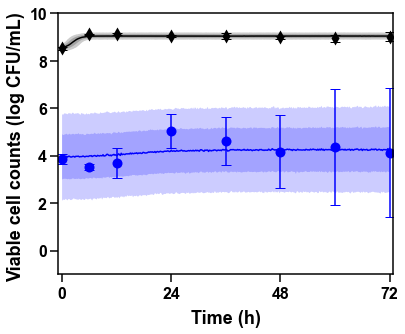

In [29]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["10"],C94_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["25"],C94_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["10"],E94_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["25"],E94_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp94_prediction80.pdf",transparent=True,bbox_inches='tight')


plt.show()

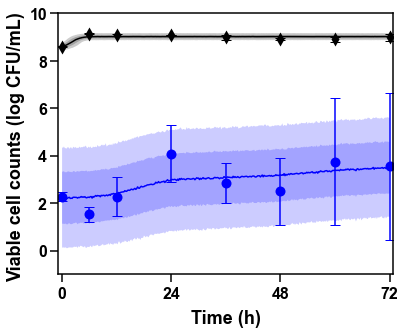

In [31]:
plt.figure(figsize=(6,4.8))


#y_Camp92
plt.errorbar(df_sd['Time'], df_sd['CO92.mean'], yerr = y_err92, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO92.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C92_add_df_2["Time"],C92_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C92_add_df_2["Time"],C92_add_df_2["10"],C92_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C92_add_df_2["Time"],C92_add_df_2["25"],C92_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent92
plt.errorbar(df_sd['Time'], df_sd['E92.mean'], yerr = y_errE92, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E92.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E92_add_df_2["Time"],E92_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E92_add_df_2["Time"],E92_add_df_2["10"],E92_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E92_add_df_2["Time"],E92_add_df_2["25"],E92_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp92_prediction80.pdf",transparent=True,bbox_inches='tight')


plt.show()

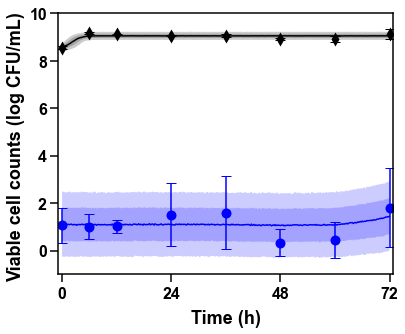

In [33]:
plt.figure(figsize=(6,4.8))


#y_Camp91
plt.errorbar(df_sd['Time'], df_sd['CO91.mean'], yerr = y_err91, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO91.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C91_add_df_2["Time"],C91_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C91_add_df_2["Time"],C91_add_df_2["10"],C91_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C91_add_df_2["Time"],C91_add_df_2["25"],C91_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent91
plt.errorbar(df_sd['Time'], df_sd['E91.mean'], yerr = y_errE91, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E91.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E91_add_df_2["Time"],E91_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E91_add_df_2["Time"],E91_add_df_2["10"],E91_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E91_add_df_2["Time"],E91_add_df_2["25"],E91_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp91_prediction80.pdf",transparent=True,bbox_inches='tight')



plt.show()

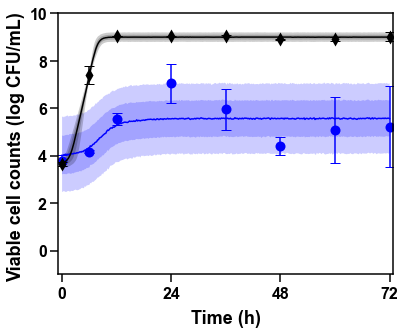

In [35]:
plt.figure(figsize=(6,4.8))


#y_Camp44
plt.errorbar(df_sd['Time'], df_sd['CO44.mean'], yerr = y_err44, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO44.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C44_add_df_2["Time"],C44_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C44_add_df_2["Time"],C44_add_df_2["10"],C44_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C44_add_df_2["Time"],C44_add_df_2["25"],C44_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent44
plt.errorbar(df_sd['Time'], df_sd['E44.mean'], yerr = y_errE44, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E44.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E44_add_df_2["Time"],E44_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E44_add_df_2["Time"],E44_add_df_2["10"],E44_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E44_add_df_2["Time"],E44_add_df_2["25"],E44_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp44_prediction80.pdf",transparent=True,bbox_inches='tight')



plt.show()

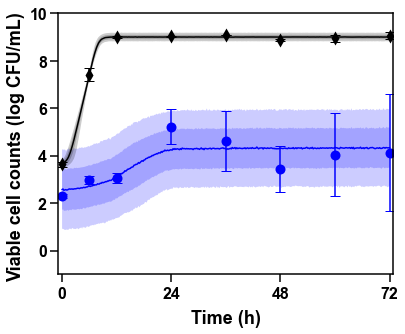

In [37]:
plt.figure(figsize=(6,4.8))


#y_Camp42
plt.errorbar(df_sd['Time'], df_sd['CO42.mean'], yerr = y_err42, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO42.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C42_add_df_2["Time"],C42_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C42_add_df_2["Time"],C42_add_df_2["10"],C42_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C42_add_df_2["Time"],C42_add_df_2["25"],C42_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent42
plt.errorbar(df_sd['Time'], df_sd['E42.mean'], yerr = y_errE42, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E42.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E42_add_df_2["Time"],E42_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E42_add_df_2["Time"],E42_add_df_2["10"],E42_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E42_add_df_2["Time"],E42_add_df_2["25"],E42_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp42_prediction80.pdf",transparent=True,bbox_inches='tight')



plt.show()

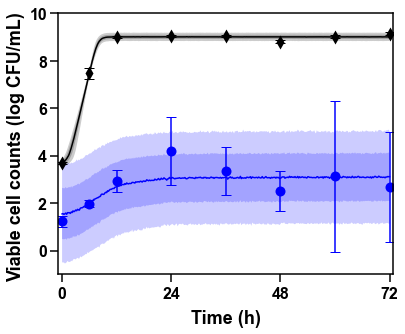

In [39]:
plt.figure(figsize=(6,4.8))


#y_Camp41
plt.errorbar(df_sd['Time'], df_sd['CO41.mean'], yerr = y_err41, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO41.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C41_add_df_2["Time"],C41_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C41_add_df_2["Time"],C41_add_df_2["10"],C41_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C41_add_df_2["Time"],C41_add_df_2["25"],C41_add_df_2["75"],facecolor='blue',alpha=0.2)

#y_Ent41
plt.errorbar(df_sd['Time'], df_sd['E41.mean'], yerr = y_errE41, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E41.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E41_add_df_2["Time"],E41_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E41_add_df_2["Time"],E41_add_df_2["10"],E41_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E41_add_df_2["Time"],E41_add_df_2["25"],E41_add_df_2["75"],facecolor='black',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp41_prediction80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [22]:
#抽出
C04_add = { }

for i in range(360):
     C04_add[i /5] = samples_C04['y_rep'][:,i] 

#％分割
C04_percentile_add = { }

for i in range(360):
     C04_percentile_add[i/5] = np.percentile(C04_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C04_add = { }

for i in range(360):
     C04_add[i /5] = samples_C04['y_rep'][:,i] 

#％分割
C04_percentile_add = { }

for i in range(360):
     C04_percentile_add[i/5] = np.percentile(C04_add[i/5],q=[10,25,50,75,90])

#合算
C04_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C04_percentile_add[i/5][0],
                         C04_percentile_add[i/5][1],
                         C04_percentile_add[i/5][2],
                         C04_percentile_add[i/5][3],
                         C04_percentile_add[i/5][4]], index=C04_add_df_2.columns)
    C04_add_df_2 = C04_add_df_2.append( tmp_se, ignore_index=True)

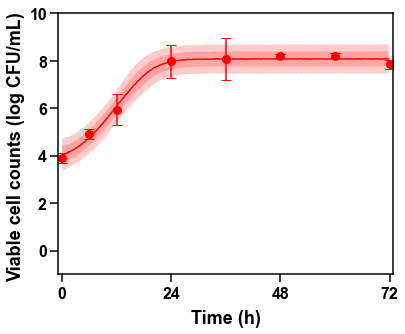

In [23]:
plt.figure(figsize=(6,4.8))


#y_Camp04
plt.errorbar(df_sd['Time'], df_sd['C4.mean'], yerr = y_err04, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='red',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['C4.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='red',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C04_add_df_2["Time"],C04_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='red')

plt.fill_between(C04_add_df_2["Time"],C04_add_df_2["10"],C04_add_df_2["90"],facecolor='red',alpha=0.2)
plt.fill_between(C04_add_df_2["Time"],C04_add_df_2["25"],C04_add_df_2["75"],facecolor='red',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp_04_prediction_80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [24]:
#抽出
C02_add = { }

for i in range(360):
     C02_add[i /5] = samples_C02['y_rep'][:,i] 

#％分割
C02_percentile_add = { }

for i in range(360):
     C02_percentile_add[i/5] = np.percentile(C02_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C02_add = { }

for i in range(360):
     C02_add[i /5] = samples_C02['y_rep'][:,i] 

#％分割
C02_percentile_add = { }

for i in range(360):
     C02_percentile_add[i/5] = np.percentile(C02_add[i/5],q=[10,25,50,75,90])

#合算
C02_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C02_percentile_add[i/5][0],
                         C02_percentile_add[i/5][1],
                         C02_percentile_add[i/5][2],
                         C02_percentile_add[i/5][3],
                         C02_percentile_add[i/5][4]], index=C02_add_df_2.columns)
    C02_add_df_2 = C02_add_df_2.append( tmp_se, ignore_index=True)

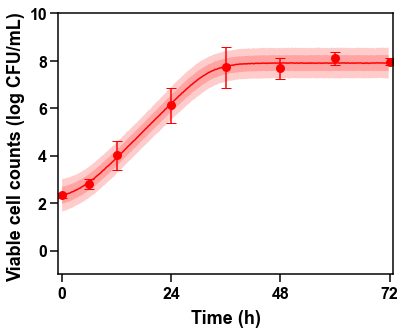

In [25]:
plt.figure(figsize=(6,4.8))


#y_Camp02
plt.errorbar(df_sd['Time'], df_sd['C2.mean'], yerr = y_err02, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='red',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['C2.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='red',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C02_add_df_2["Time"],C02_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='red')

plt.fill_between(C02_add_df_2["Time"],C02_add_df_2["10"],C02_add_df_2["90"],facecolor='red',alpha=0.2)
plt.fill_between(C02_add_df_2["Time"],C02_add_df_2["25"],C02_add_df_2["75"],facecolor='red',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp_02_prediction_80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [26]:
#抽出
C01_add = { }

for i in range(360):
     C01_add[i /5] = samples_C01['y_rep'][:,i] 

#％分割
C01_percentile_add = { }

for i in range(360):
     C01_percentile_add[i/5] = np.percentile(C01_add[i/5],q=[10,25,50,75,90])

#合算#抽出
C01_add = { }

for i in range(360):
     C01_add[i /5] = samples_C01['y_rep'][:,i] 

#％分割
C01_percentile_add = { }

for i in range(360):
     C01_percentile_add[i/5] = np.percentile(C01_add[i/5],q=[10,25,50,75,90])

#合算
C01_add_df_2 = pd.DataFrame(columns=['Time','10','25','50','75','90'])

for i in range(360):
    tmp_se = pd.Series( [i/5,
                         C01_percentile_add[i/5][0],
                         C01_percentile_add[i/5][1],
                         C01_percentile_add[i/5][2],
                         C01_percentile_add[i/5][3],
                         C01_percentile_add[i/5][4]], index=C01_add_df_2.columns)
    C01_add_df_2 = C01_add_df_2.append( tmp_se, ignore_index=True)

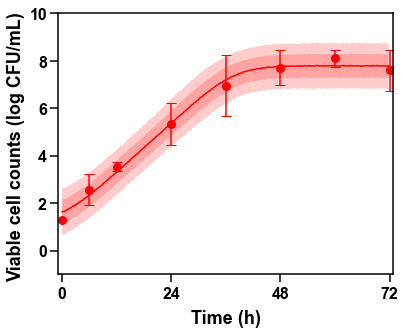

In [27]:
plt.figure(figsize=(6,4.8))


#y_Camp01
plt.errorbar(df_sd['Time'], df_sd['C1.mean'], yerr = y_err01, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='red',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['C1.mean'],
         marker='o',
         markersize=9,
         markerfacecolor='red',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C01_add_df_2["Time"],C01_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='red')

plt.fill_between(C01_add_df_2["Time"],C01_add_df_2["10"],C01_add_df_2["90"],facecolor='red',alpha=0.2)
plt.fill_between(C01_add_df_2["Time"],C01_add_df_2["25"],C01_add_df_2["75"],facecolor='red',alpha=0.2)

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp_01_prediction_80.pdf",transparent=True,bbox_inches='tight')



plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

In [39]:
C94_0_bay = np.percentile(samples_C94['y_rep'][:,0],q= 50)
C94_6_bay = np.percentile(samples_C94['y_rep'][:,30],q= 50)
C94_12_bay = np.percentile(samples_C94['y_rep'][:,60],q= 50)
C94_24_bay = np.percentile(samples_C94['y_rep'][:,120],q= 50)
C94_36_bay = np.percentile(samples_C94['y_rep'][:,180],q= 50)
C94_48_bay = np.percentile(samples_C94['y_rep'][:,240],q= 50)
C94_60_bay = np.percentile(samples_C94['y_rep'][:,300],q= 50)
C94_72_bay = np.percentile(samples_C94['y_rep'][:,360],q= 50)

y94_bay = [C94_0_bay,C94_6_bay,C94_12_bay,C94_24_bay,C94_36_bay,C94_48_bay,C94_60_bay,C94_72_bay]

RMSE_94 = np.sqrt(mean_squared_error(y94_bay, y_94))

print(RMSE_94)

0.37681654865027053


In [40]:
C92_0_bay = np.percentile(samples_C92['y_rep'][:,0],q= 50)
C92_6_bay = np.percentile(samples_C92['y_rep'][:,30],q= 50)
C92_12_bay = np.percentile(samples_C92['y_rep'][:,60],q= 50)
C92_24_bay = np.percentile(samples_C92['y_rep'][:,120],q= 50)
C92_36_bay = np.percentile(samples_C92['y_rep'][:,180],q= 50)
C92_48_bay = np.percentile(samples_C92['y_rep'][:,240],q= 50)
C92_60_bay = np.percentile(samples_C92['y_rep'][:,300],q= 50)
C92_72_bay = np.percentile(samples_C92['y_rep'][:,360],q= 50)

y92_bay = [C92_0_bay,C92_6_bay,C92_12_bay,C92_24_bay,C92_36_bay,C92_48_bay,C92_60_bay,C92_72_bay]

RMSE_92 = np.sqrt(mean_squared_error(y92_bay, y_92))

print(RMSE_92)

0.5457726354457136


In [41]:
C91_0_bay = np.percentile(samples_C91['y_rep'][:,0],q= 50)
C91_6_bay = np.percentile(samples_C91['y_rep'][:,30],q= 50)
C91_12_bay = np.percentile(samples_C91['y_rep'][:,60],q= 50)
C91_24_bay = np.percentile(samples_C91['y_rep'][:,120],q= 50)
C91_36_bay = np.percentile(samples_C91['y_rep'][:,180],q= 50)
C91_48_bay = np.percentile(samples_C91['y_rep'][:,240],q= 50)
C91_60_bay = np.percentile(samples_C91['y_rep'][:,300],q= 50)
C91_72_bay = np.percentile(samples_C91['y_rep'][:,360],q= 50)

y91_bay = [C91_0_bay,C91_6_bay,C91_12_bay,C91_24_bay,C91_36_bay,C91_48_bay,C91_60_bay,C91_72_bay]

RMSE_91 = np.sqrt(mean_squared_error(y91_bay, y_91))

print(RMSE_91)

0.440125644341443


In [42]:
C44_0_bay = np.percentile(samples_C44['y_rep'][:,0],q= 50)
C44_6_bay = np.percentile(samples_C44['y_rep'][:,30],q= 50)
C44_12_bay = np.percentile(samples_C44['y_rep'][:,60],q= 50)
C44_24_bay = np.percentile(samples_C44['y_rep'][:,120],q= 50)
C44_36_bay = np.percentile(samples_C44['y_rep'][:,180],q= 50)
C44_48_bay = np.percentile(samples_C44['y_rep'][:,240],q= 50)
C44_60_bay = np.percentile(samples_C44['y_rep'][:,300],q= 50)
C44_72_bay = np.percentile(samples_C44['y_rep'][:,360],q= 50)

y44_bay = [C44_0_bay,C44_6_bay,C44_12_bay,C44_24_bay,C44_36_bay,C44_48_bay,C44_60_bay,C44_72_bay]

RMSE_44 = np.sqrt(mean_squared_error(y44_bay, y_44))

print(RMSE_44)

0.7245495591374035


In [43]:
C42_0_bay = np.percentile(samples_C42['y_rep'][:,0],q= 50)
C42_6_bay = np.percentile(samples_C42['y_rep'][:,30],q= 50)
C42_12_bay = np.percentile(samples_C42['y_rep'][:,60],q= 50)
C42_24_bay = np.percentile(samples_C42['y_rep'][:,120],q= 50)
C42_36_bay = np.percentile(samples_C42['y_rep'][:,180],q= 50)
C42_48_bay = np.percentile(samples_C42['y_rep'][:,240],q= 50)
C42_60_bay = np.percentile(samples_C42['y_rep'][:,300],q= 50)
C42_72_bay = np.percentile(samples_C42['y_rep'][:,360],q= 50)

y42_bay = [C42_0_bay,C42_6_bay,C42_12_bay,C42_24_bay,C42_36_bay,C42_48_bay,C42_60_bay,C42_72_bay]

RMSE_42 = np.sqrt(mean_squared_error(y42_bay, y_42))

print(RMSE_42)

0.5130023990735776


In [44]:
C41_0_bay = np.percentile(samples_C41['y_rep'][:,0],q= 50)
C41_6_bay = np.percentile(samples_C41['y_rep'][:,30],q= 50)
C41_12_bay = np.percentile(samples_C41['y_rep'][:,60],q= 50)
C41_24_bay = np.percentile(samples_C41['y_rep'][:,120],q= 50)
C41_36_bay = np.percentile(samples_C41['y_rep'][:,180],q= 50)
C41_48_bay = np.percentile(samples_C41['y_rep'][:,240],q= 50)
C41_60_bay = np.percentile(samples_C41['y_rep'][:,300],q= 50)
C41_72_bay = np.percentile(samples_C41['y_rep'][:,360],q= 50)

y41_bay = [C41_0_bay,C41_6_bay,C41_12_bay,C41_24_bay,C41_36_bay,C41_48_bay,C41_60_bay,C41_72_bay]

RMSE_41 = np.sqrt(mean_squared_error(y41_bay, y_41))

print(RMSE_41)

0.5041556331896895


In [45]:
print(RMSE_94,RMSE_92,RMSE_91,RMSE_44,RMSE_42,RMSE_41)

0.37681654865027053 0.5457726354457136 0.440125644341443 0.7245495591374035 0.5130023990735776 0.5041556331896895


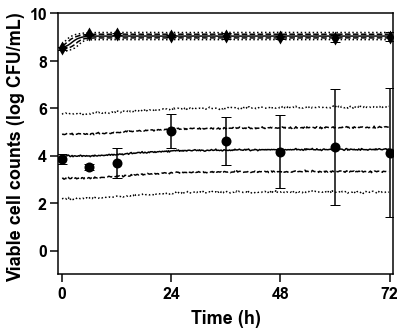

In [23]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["10"],
         marker='None',
         linestyle=':',color='black')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["90"],
         marker='None',
         linestyle=':',color='black')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["25"],
         marker='None',
         linestyle='--',color='black')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["75"],
         marker='None',
         linestyle='--',color='black')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='black')

#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')


plt.plot(E94_add_df_2["Time"],E94_add_df_2["10"],
         marker='None',
         linestyle=':',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["90"],
         marker='None',
         linestyle=':',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["25"],
         marker='None',
         linestyle='--',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["75"],
         marker='None',
         linestyle='--',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/koenyoshi_Camp_94_prediction_80.pdf",transparent=True,bbox_inches='tight')

plt.show()

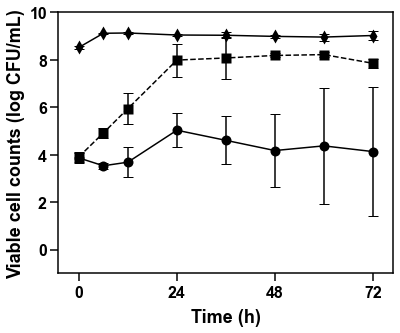

In [26]:
plt.figure(figsize=(6,4.8))

plt.errorbar(x, y_94, yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(x,y_94,
         marker='o',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='solid',
         color='black',
         label='Listeria Co-Culture')

plt.errorbar(x, y_04, yerr = y_err04, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')
plt.plot(x,y_04,
         marker='s',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='dashed',
         color='black',
         label='Listeria Control')


plt.errorbar(x, y_E94, yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=9, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(x,y_E94,
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='solid',
         color='black',
         label='Listeria bacteria')

plt.axis([-5,
          77,
          -1,
          9])


plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL)',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/koenyoshi_Camp_Competition94_with Err.pdf",transparent=True,bbox_inches='tight',)

plt.show()

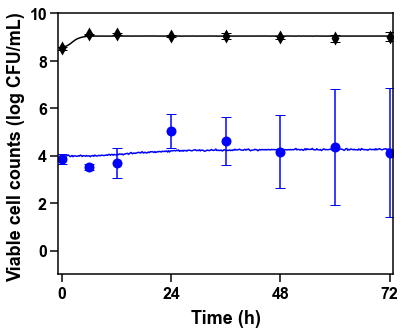

In [43]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/Camp94_prediction50only.pdf",transparent=True,bbox_inches='tight')

plt.show()

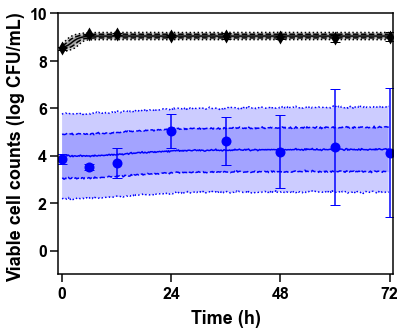

In [9]:
plt.figure(figsize=(6,4.8))


#y_Camp94
plt.errorbar(df_sd['Time'], df_sd['CO94.mean'], yerr = y_err94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='blue',
             markeredgecolor = "None",
             label='')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["10"],
         marker='None',
         linestyle=':',color='blue')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["90"],
         marker='None',
         linestyle=':',color='blue')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["25"],
         marker='None',
         linestyle='--',color='blue')
plt.plot(C94_add_df_2["Time"],C94_add_df_2["75"],
         marker='None',
         linestyle='--',color='blue')

plt.plot(df_sd['Time'],df_sd['CO94.mean'],
         marker='o',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='None',
         linestyle='None')

plt.plot(C94_add_df_2["Time"],C94_add_df_2["50"],
         marker='None',
         linestyle='solid',
         color='blue')

plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["10"],C94_add_df_2["90"],facecolor='blue',alpha=0.2)
plt.fill_between(C94_add_df_2["Time"],C94_add_df_2["25"],C94_add_df_2["75"],facecolor='blue',alpha=0.2)


#y_Ent94
plt.errorbar(df_sd['Time'], df_sd['E94.mean'], yerr = y_errE94, 
             capsize=5, 
             fmt='None', 
             markersize=10, 
             ecolor='black',
             markeredgecolor = "None",
             label='')

plt.plot(df_sd['Time'],df_sd['E94.mean'],
         marker='d',
         markersize=10,
         markerfacecolor='black',
         markeredgecolor='None',
         linestyle='None')


plt.plot(E94_add_df_2["Time"],E94_add_df_2["10"],
         marker='None',
         linestyle=':',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["90"],
         marker='None',
         linestyle=':',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["25"],
         marker='None',
         linestyle='--',color='black')
plt.plot(E94_add_df_2["Time"],E94_add_df_2["75"],
         marker='None',
         linestyle='--',color='black')

plt.plot(E94_add_df_2["Time"],E94_add_df_2["50"],
         linestyle='solid',
         color='black')

plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["10"],E94_add_df_2["90"],facecolor='black',alpha=0.2)
plt.fill_between(E94_add_df_2["Time"],E94_add_df_2["25"],E94_add_df_2["75"],facecolor='black',alpha=0.2)


plt.axis([-0.8,
          72.8,
          -1,
          9])

plt.xticks([0,24,48,72],
           size=16,
           weight='bold')

plt.yticks([0,2,4,6,8,10],
           size=16,
           weight='bold')

plt.xlabel('Time (h)',
          size=18,
          weight='bold', 
          labelpad=8)

plt.ylabel('Viable cell counts (log CFU/mL) ',
           size=18,
           weight='bold') 

plt.savefig("/Users/y.fuchisawa/Dropbox/渕澤/実験データ2020年度/model/Camp_baranyi/koenyoslide_Camp_94_prediction_80.pdf",transparent=True,bbox_inches='tight')

plt.show()

In [21]:
def func1(ts,Nmax,mumax,lag, N0): # １次式近似
    y = Nmax + np.log10((-1 + np.exp(mumax * lag) + np.exp(mumax * ts))/(np.exp(mumax * ts) -1 + (np.exp(mumax * lag) * 10**(Nmax - N0))))
    return y

In [22]:
x_observed = np.array(ts)
y04_observed = np.array(C04)
y02_observed = np.array(C02)
y01_observed = np.array(C01)

In [23]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,x_observed,y04_observed) # poptは最適推定値、pcovは共分散
popt

array([8.09552263, 0.45455745, 1.3447832 , 3.91692834])

In [24]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,x_observed,y02_observed) # poptは最適推定値、pcovは共分散
popt

/opt/anaconda3/envs/forStan/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


array([7.9057958 , 0.42722853, 3.40621423, 2.31247253])

In [25]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func1,x_observed,y01_observed) # poptは最適推定値、pcovは共分散
popt

array([ 7.81819813,  0.3377852 , -3.19289714,  1.29810671])